# Image Data Processing and Augmentation(to make more data)

## Setup and Data Path Configuration

In [ ]:
import os
from google.colab import drive

drive.mount("/content/drive")

# shared path to drive
SHARED_PATH = "/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours"
# direct path to drive
DIRECT_PATH = "/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours"

# Determine the data path based on the existence of shared or direct paths
root_path = (
    SHARED_PATH
    if os.path.exists(SHARED_PATH)
    else DIRECT_PATH
    if os.path.exists(DIRECT_PATH)
    else None
)

DATA_PATH = ""
# Print the chosen path or an error message
if root_path:
    DATA_PATH = root_path + "/Proj2_Heritage_places_in_CGR_classify"
    print(f"Using path: {root_path}\n\n{os.listdir(DATA_PATH)}")
else:
    print("Neither shared nor direct path exists. Please check the paths.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using path: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours

['Data', 'old_experiments', 'data.csv', 'expr2_effnet.ipynb', 'expr1_resnet18.ipynb', 'maximize_dataset_make_csv_data.ipynb', 'training_images', 'validate_images']


## Saving Dataframe and Visualizing Class Distribution

### Dataframe Creation and Exploration

In [ ]:
import pandas as pd


def create_image_dataframe(root_dir):
    image_dict = {}
    for folder in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder)
        if os.path.isdir(folder_path):
            image_dict[folder] = []
            for filename in os.listdir(folder_path):
                # You can add an extension check here if needed
                # if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                rel_path = folder_path.split("/")
                image_path = os.path.join("/", rel_path[-2], rel_path[-1], filename)
                image_dict[folder].append(image_path)

    data = []
    for class_name, images in image_dict.items():
        for img_path in images:
            data.append({"path": img_path, "class": class_name})

    df = pd.DataFrame(data)
    return df

In [ ]:
# Example usage:
# DATA_PATH is assumed to be defined from the previous cells
df = create_image_dataframe(DATA_PATH + "/Data")
print(df)
print(df.describe())

# uncomment to save as csv data
# df.to_csv(DATA_PATH+'/data.csv', index=False)
os.listdir(DATA_PATH)

                              path        class
0       /Data/mondir/tmpl_0007.JPG       mondir
1       /Data/mondir/tmpl_0008.jpg       mondir
2       /Data/mondir/tmpl_0006.jpg       mondir
3      /Data/mondir/tmpl_0005.webp       mondir
4      /Data/mondir/tmpl_0004.jpeg       mondir
..                             ...          ...
68   /Data/clock_tower/ct_0003.jpg  clock_tower
69  /Data/clock_tower/ct_0002.webp  clock_tower
70   /Data/clock_tower/ct_0001.jpg  clock_tower
71  /Data/clock_tower/ct_0007.jpeg  clock_tower
72  /Data/clock_tower/ct_0008.jpeg  clock_tower

[73 rows x 2 columns]
                              path      class
count                           73         73
unique                          73          6
top     /Data/mondir/tmpl_0007.JPG  jora_ghat
freq                             1         17


['Data',
 'old_experiments',
 'data.csv',
 'expr2_effnet.ipynb',
 'expr1_resnet18.ipynb',
 'maximize_dataset_make_csv_data.ipynb',
 'training_images',
 'validate_images']

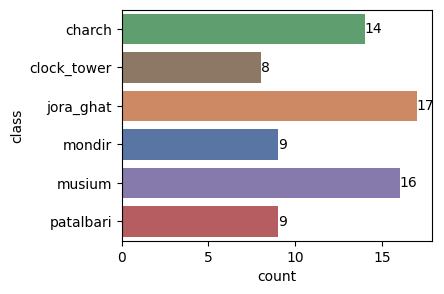

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
ax = sns.countplot(
    y="class", data=df, hue="class", palette="deep", order=sorted(df["class"].unique())
)

# Add bar counts
for container in ax.containers:
    ax.bar_label(container, fmt="%d")

plt.show()

### Train Validation split

In [ ]:
from sklearn.model_selection import train_test_split

# splitting a dataset in such a way that the proportion of samples in each class is the same across the training and testing sets.
train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=2025, stratify=df["class"]
)
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=2025)

print("------------", len(train_df), "----------------")
display(train_df.head())
print("------------", len(test_df), "----------------")
display(test_df.head())

# save train and test data csv
# train_df.to_csv(DATA_PATH+'/training_df.csv', index=False)
# test_df.to_csv(DATA_PATH+'/validate_df.csv', index=False)

------------ 58 ----------------


,path,class
27,/Data/charch/crch_00013.jpg,charch
19,/Data/jora_ghat/ghat_0005.webp,jora_ghat
52,/Data/musium/mus_00012.jpg,musium
45,/Data/patalbari/pb_0006.jpeg,patalbari
14,/Data/jora_ghat/ghat_00010.webp,jora_ghat


------------ 15 ----------------


,path,class
61,/Data/musium/mus_0003.jpg,musium
8,/Data/mondir/tmpl_0009.jpeg,mondir
10,/Data/jora_ghat/ghat_00015.jpg,jora_ghat
18,/Data/jora_ghat/ghat_0006.jpg,jora_ghat
34,/Data/charch/crch_0006.jpg,charch


### Plot train-test splited data

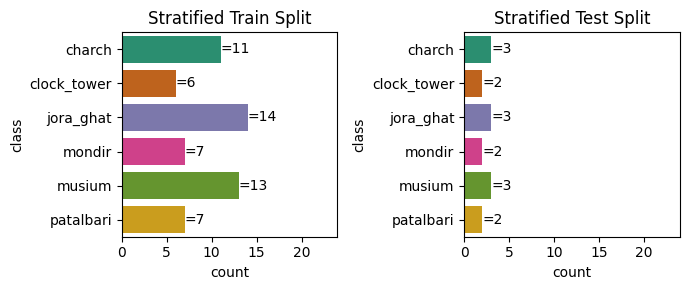

In [ ]:
def plot_class_distribution(data, ax, title, max_count, class_order, palette):
    sns.countplot(
        y="class",
        data=data,
        hue="class",
        palette=palette,
        ax=ax,
        hue_order=class_order,
        order=class_order,
    )
    ax.set_title(title)
    ax.set_xlim(0, max_count)
    for brs in ax.containers:
        ax.bar_label(brs, fmt="=%d")


# Calculate the maximum count across all splits
max_count = 10 + max(
    train_df["class"].value_counts().max(), test_df["class"].value_counts().max()
)

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
# Get the unique class names in the desired order (e.g., alphabetical)
class_order = sorted(df["class"].unique())
consistent_palette = sns.color_palette("Dark2", n_colors=len(class_order))

# Use the function to plot the distributions
plot_class_distribution(
    train_df,
    axes[0],
    title="Stratified Train Split",
    max_count=max_count,
    class_order=class_order,
    palette=consistent_palette,
)
plot_class_distribution(
    test_df,
    axes[1],
    title="Stratified Test Split",
    max_count=max_count,
    class_order=class_order,
    palette=consistent_palette,
)

plt.tight_layout()
plt.show()

## Functions Definitions ...

### Image augmentation & edits

In [ ]:
import os
import random
import numpy as np
import albumentations as A
import cv2

random.seed(2025)


def augment_image(image_path, output_folder, n_aug_per_image):
    """
    Loads an image using OpenCV, applies augmentations with Albumentations,
    and saves the augmented versions.
    Args:
        image_path (str): Full path to the input image.
        output_folder (str): Path to the folder where augmented images will be saved.
        num_augmentations_per_image (int): Number of augmented versions to create for each image.
    """
    try:
        # Load image using OpenCV (loads in BGR format by default)
        img_np = cv2.imread(image_path)
        # Albumentations expects RGB, so convert from BGR
        img_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
        img_name = os.path.basename(image_path)
        base_name, extension = os.path.splitext(img_name)

        # Define an augmentation pipeline using Albumentations
        edit_img = A.Compose(
            [
                # --- Color/Pixel Augmentations ---
                A.RandomBrightnessContrast(
                    brightness_limit=0.2, contrast_limit=0.2, p=0.8
                ),
                A.HueSaturationValue(
                    hue_shift_limit=0.1, sat_shift_limit=0.1, val_shift_limit=0.1, p=0.6
                ),
                # --- Geometric Augmentations (These maintain original image dimensions unless border_mode expands) ---
                A.HorizontalFlip(p=0.5),  # Strongly recommended if applicable
                A.Rotate(
                    limit=20,
                    p=0.5,
                    border_mode=cv2.BORDER_REFLECT,  # Fills rotated areas
                ),
                A.Affine(
                    shear={"x": (-15, 15), "y": (-0, 0)},
                    p=0.3,
                    border_mode=cv2.BORDER_REFLECT,
                ),
                # --- Regularization Augmentations ---
                A.GaussNoise(p=0.1),
                # --- IMPORTANT: DO NOT INCLUDE NORMALIZATION, TENSOR CONVERSION, OR RESIZING/CROPPING HERE ---
                # These will be done by torchvision.transforms later, in the DataLoader.
                # A.RandomResizedCrop(...)  <-- NO
                # A.Normalize(...)          <-- NO
                # A.ToTensorV2()            <-- NO
            ]
        )

        for i in range(n_aug_per_image):
            # Apply the augmentation pipeline
            augmented_img_dict = edit_img(
                image=img_np
            )  # {'image':array([]), 'dtype':int64}
            augmented_img_np = augmented_img_dict["image"]
            # Convert back to BGR for saving with cv2.imwrite
            augmented_img_np_bgr = cv2.cvtColor(augmented_img_np, cv2.COLOR_RGB2BGR)
            # Save the augmented image using OpenCV
            augmented_img_name = f"{base_name}_aug{i}{extension}"
            augmented_img_path = os.path.join(output_folder, augmented_img_name)
            cv2.imwrite(augmented_img_path, augmented_img_np_bgr)
        print(f"  Generated..{n_aug_per_image} ")

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

### to make more Samples

In [ ]:
def process_folder_perform_augment(data_folder, n_duplicate=1):
    """
    Iterates through all images in the specified folder and applies augmentation.
    """
    if not os.path.exists(data_folder):
        print(f"Error: Folder '{data_folder}' not found.")
        return

    print(f"Starting augmentation for images in: {data_folder}")
    for root, _, files in os.walk(data_folder):
        for file in files:
            if file.lower().endswith(
                (".png", ".jpg", ".jpeg", ".gif", ".bmp", ".webp")
            ):
                image_path = os.path.join(root, file)
                print(f"Processing: {file}", end="")
                augment_image(
                    image_path, root, n_duplicate
                )  # Saving in the same folder

### Delete images with suffix given

In [ ]:
import re  # Import the regular expression module


def delete_files_with_regix_suffix(folder_path, suffix_pattern):
    """
    Deletes files in a folder that match a given suffix pattern using regex.
    """
    print(
        f"Searching for and removing files matching pattern '{suffix_pattern}'\n-in: {folder_path}"
    )
    for root, _, files in os.walk(folder_path):
        for file in files:
            # Use re.search to find the pattern in the filename (case-insensitive)
            if re.search(suffix_pattern, file, re.IGNORECASE):
                file_path = os.path.join(root, file)
                os.remove(file_path)
        # print(f"Removed duplicate of: {files}")
    print(f"Removed old duplicates............\n")


### list subfolder items


In [ ]:
from IPython.display import display


def count_items_in_subfolders(folder_path):
    item_count_list = []
    # Iterate through each subfolder and count the items
    subfolder_list = os.listdir(folder_path)
    for subfolder_name in subfolder_list:
        subfolder_path = os.path.join(folder_path, subfolder_name)
        if os.path.isdir(subfolder_path):  # Check if it's actually a directory
            item_count = len(os.listdir(subfolder_path))
            item_count_list.append(item_count)
    # return as dictionary.....
    return dict(zip(subfolder_list, item_count_list))

### Make image folders accordingly to csv

In [ ]:
import os
import shutil


# Function to copy images based on DataFrame
def copy_images(dataframe, destination_dir):
    for index, row in dataframe.iterrows():
        image_path = row["path"]
        class_name = row["class"]

        source_path = os.path.join(
            DATA_PATH, image_path.lstrip("/")
        )  # Adjust this line based on your exact path structure
        destination_path = os.path.join(
            destination_dir, class_name, os.path.basename(source_path)
        )

        try:
            shutil.copy(source_path, destination_path)
            print(
                f"copy{source_path.split('/')[-3:]} -->> {destination_path.split('/')[-3:]}"
            )
        except FileNotFoundError:
            print(f"Warning: File not found at {source_path}. Skipping.")


## Building training and validation folder copying images

In [ ]:
# Define the target directories
train_dir = os.path.join(DATA_PATH, "training_images")
val_dir = os.path.join(
    DATA_PATH, "validate_images"
)  # Using 'val' for validation as is common

# Create the directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Create class subdirectories within train and validation directories
for class_name in df["class"].unique():
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)


# Copy images for the training set
print("----------Copying training images.................")
copy_images(train_df, train_dir)

# Copy images for the validation set
print("-----------Copying validation images...............")
copy_images(test_df, val_dir)

print("________Image copying complete_________")

----------Copying training images.................
copy['Data', 'charch', 'crch_00013.jpg'] -->> ['training_images', 'charch', 'crch_00013.jpg']
copy['Data', 'jora_ghat', 'ghat_0005.webp'] -->> ['training_images', 'jora_ghat', 'ghat_0005.webp']
copy['Data', 'musium', 'mus_00012.jpg'] -->> ['training_images', 'musium', 'mus_00012.jpg']
copy['Data', 'patalbari', 'pb_0006.jpeg'] -->> ['training_images', 'patalbari', 'pb_0006.jpeg']
copy['Data', 'jora_ghat', 'ghat_00010.webp'] -->> ['training_images', 'jora_ghat', 'ghat_00010.webp']
copy['Data', 'musium', 'mus_0001.jpg'] -->> ['training_images', 'musium', 'mus_0001.jpg']
copy['Data', 'charch', 'crch_0004.jpg'] -->> ['training_images', 'charch', 'crch_0004.jpg']
copy['Data', 'musium', 'mus_00013.jpg'] -->> ['training_images', 'musium', 'mus_00013.jpg']
copy['Data', 'patalbari', 'pb_0002.jpeg'] -->> ['training_images', 'patalbari', 'pb_0002.jpeg']
copy['Data', 'charch', 'crch_0009.jpg'] -->> ['training_images', 'charch', 'crch_0009.jpg']
cop

## Image dataset maximizing

In [ ]:
folder_path = DATA_PATH + "/Data"
display(count_items_in_subfolders(folder_path))

# fset folder path to training_images
# !DO NOT EDIT validation images set
folder_path = train_dir + "/"
# Define the pattern: '_aug' followed by one or more digits, then a dot and any extension
suffix_pattern = r"_aug\d+\..+"

{'mondir': 9,
 'jora_ghat': 17,
 'charch': 14,
 'patalbari': 9,
 'musium': 16,
 'clock_tower': 8}

In [14]:
# delete old copies to avoid conflict
delete_files_with_regix_suffix(folder_path, suffix_pattern)

count_map = count_items_in_subfolders(folder_path)
display(count_map)

Searching for and removing files matching pattern '_aug\d+\..+'
-in: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/Proj2_Heritage_places_in_CGR_classify/training_images/
Removed old duplicates............



{'mondir': 7,
 'jora_ghat': 14,
 'charch': 11,
 'patalbari': 7,
 'musium': 13,
 'clock_tower': 6}

In [ ]:
dupl_frequency = count_map.copy()
target_max_count = 50

for i in dupl_frequency.keys():
    calc = (target_max_count - dupl_frequency[i]) / dupl_frequency[i]
    print(calc)
    dupl_frequency[i] = round(calc)

print(
    f"\nAdjustable multiplier for producing {target_max_count} items ................."
)
display(dupl_frequency)

classes = list(dupl_frequency.keys())
print(classes)

6.142857142857143
2.5714285714285716
3.5454545454545454
6.142857142857143
2.8461538461538463
7.333333333333333

Adjustable multiplier for producing 50 items .................


{'mondir': 6,
 'jora_ghat': 3,
 'charch': 4,
 'patalbari': 6,
 'musium': 3,
 'clock_tower': 7}

['mondir', 'jora_ghat', 'charch', 'patalbari', 'musium', 'clock_tower']


In [ ]:
process_folder_perform_augment(folder_path + classes[0], dupl_frequency[classes[0]])
count_items_in_subfolders(folder_path)

Starting augmentation for images in: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/Proj2_Heritage_places_in_CGR_classify/training_images/mondir
Processing: tmpl_0007.JPG  Generated..6 
Processing: tmpl_0008.jpg  Generated..6 
Processing: tmpl_0006.jpg  Generated..6 
Processing: tmpl_0001.jpg  Generated..6 
Processing: tmpl_0005.webp  Generated..6 
Processing: tmpl_0002.webp  Generated..6 
Processing: tmpl_0004.jpeg  Generated..6 


{'mondir': 49,
 'jora_ghat': 14,
 'charch': 11,
 'patalbari': 7,
 'musium': 13,
 'clock_tower': 6}

In [ ]:
process_folder_perform_augment(folder_path + classes[1], dupl_frequency[classes[1]])
count_items_in_subfolders(folder_path)

Starting augmentation for images in: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/Proj2_Heritage_places_in_CGR_classify/training_images/jora_ghat
Processing: ghat_0005.webp  Generated..3 
Processing: ghat_00010.webp  Generated..3 
Processing: ghat_0001.jpg  Generated..3 
Processing: ghat_00014.JPG  Generated..3 
Processing: ghat_0009.jpg  Generated..3 
Processing: ghat_0007.jpg  Generated..3 
Processing: ghat_0008.jpg  Generated..3 
Processing: ghat_00012.webp  Generated..3 
Processing: ghat_00013.jpeg  Generated..3 
Processing: ghat_0002.jpg  Generated..3 
Processing: ghat_00016.jpg  Generated..3 
Processing: ghat_00017.jpeg  Generated..3 
Processing: ghat_0004.jpeg  Generated..3 
Processing: ghat_0003.jpg  Generated..3 


{'mondir': 49,
 'jora_ghat': 56,
 'charch': 11,
 'patalbari': 7,
 'musium': 13,
 'clock_tower': 6}

In [ ]:
process_folder_perform_augment(folder_path + classes[2], dupl_frequency[classes[2]])
count_items_in_subfolders(folder_path)

Starting augmentation for images in: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/Proj2_Heritage_places_in_CGR_classify/training_images/charch
Processing: crch_00013.jpg  Generated..4 
Processing: crch_0004.jpg  Generated..4 
Processing: crch_0009.jpg  Generated..4 
Processing: crch_0003.jpg  Generated..4 
Processing: crch_00014.JPG  Generated..4 
Processing: crch_00011.jpg  Generated..4 
Processing: crch_0008.jpg  Generated..4 
Processing: crch_0007.webp  Generated..4 
Processing: crch_0005.jpg  Generated..4 
Processing: crch_00010.png  Generated..4 
Processing: crch_0001.webp  Generated..4 


{'mondir': 49,
 'jora_ghat': 56,
 'charch': 55,
 'patalbari': 7,
 'musium': 13,
 'clock_tower': 6}

In [ ]:
process_folder_perform_augment(folder_path + classes[3], dupl_frequency[classes[3]])
count_items_in_subfolders(folder_path)

Starting augmentation for images in: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/Proj2_Heritage_places_in_CGR_classify/training_images/patalbari
Processing: pb_0006.jpeg  Generated..6 
Processing: pb_0002.jpeg  Generated..6 
Processing: pb_0005.jpeg  Generated..6 
Processing: pb_0009.jpeg  Generated..6 
Processing: pb_0003.webp  Generated..6 
Processing: pb_0004.JPG  Generated..6 
Processing: pb_0001.jpg  Generated..6 


{'mondir': 49,
 'jora_ghat': 56,
 'charch': 55,
 'patalbari': 49,
 'musium': 13,
 'clock_tower': 6}

In [ ]:
process_folder_perform_augment(folder_path + classes[4], dupl_frequency[classes[4]])
count_items_in_subfolders(folder_path)

Starting augmentation for images in: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/Proj2_Heritage_places_in_CGR_classify/training_images/musium
Processing: mus_00012.jpg  Generated..3 
Processing: mus_0001.jpg  Generated..3 
Processing: mus_00013.jpg  Generated..3 
Processing: mus_0005.webp  Generated..3 
Processing: mus_0009.webp  Generated..3 
Processing: mus_0004.jpg  Generated..3 
Processing: mus_00015.JPG  Generated..3 
Processing: mus_0007.jpg  Generated..3 
Processing: mus_00014.jpg  Generated..3 
Processing: mus_0006.jpg  Generated..3 
Processing: mus_0002.jpeg  Generated..3 
Processing: mus_0010.jpeg  Generated..3 
Processing: mus_0008.jpg  Generated..3 


{'mondir': 49,
 'jora_ghat': 56,
 'charch': 55,
 'patalbari': 49,
 'musium': 52,
 'clock_tower': 6}

In [ ]:
process_folder_perform_augment(folder_path + classes[5], dupl_frequency[classes[5]])
count_items_in_subfolders(folder_path)

Starting augmentation for images in: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/Proj2_Heritage_places_in_CGR_classify/training_images/clock_tower
Processing: ct_0007.jpeg  Generated..7 
Processing: ct_0005.jpg  Generated..7 
Processing: ct_0004.webp  Generated..7 
Processing: ct_0003.jpg  Generated..7 
Processing: ct_0006.jpg  Generated..7 
Processing: ct_0002.webp  Generated..7 


{'mondir': 49,
 'jora_ghat': 56,
 'charch': 55,
 'patalbari': 49,
 'musium': 52,
 'clock_tower': 48}

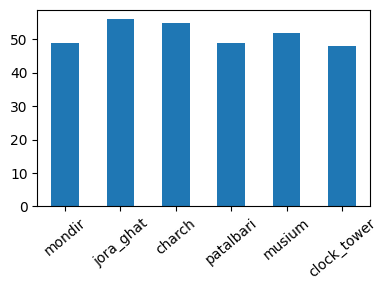

In [ ]:
counts = pd.Series(count_items_in_subfolders(folder_path))
# Create a bar plot using pandas plot function
counts.plot(kind="bar", figsize=(4, 3))
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()